Importing modules

In [99]:
import os
import json
from collections import Counter

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import LabelBinarizer

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.convolutional import Convolution1D

Loading data

In [2]:
posts_data_path = os.path.join("data", "cleaned_posts.json")

train = []
labels = []

with open(posts_data_path) as file_obj:
    data = json.load(file_obj)
    
    train, labels = zip(*data)

Plot labels counts

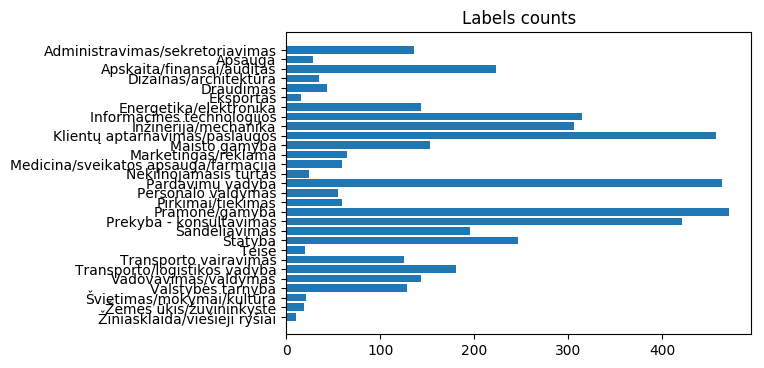

In [32]:
counter = Counter(labels)

fig, ax = plt.subplots(dpi=100)

ax.barh(list(counter.keys()), list(counter.values()))
ax.invert_yaxis()
ax.set_title("Labels counts")

plt.show()

Splitting data into train and test sets

In [3]:
x_train, x_test, y_train, y_test = train_test_split(train, labels, test_size=0.3)

print(len(x_train), len(x_test))
print(len(y_train), len(y_test))

3193 1369
3193 1369


Naive bayes

In [4]:
pipe = Pipeline([("vect", CountVectorizer()),
                 ("tfidf", TfidfTransformer()),
                 ("clf", MultinomialNB())])

parameters = {"vect__ngram_range": [(1, 1), (1, 2)],
              "tfidf__use_idf": (True, False),
              "clf__alpha": (1e-2, 1e-3)}

grid = GridSearchCV(pipe, cv=3, n_jobs=1, param_grid=parameters)
grid.fit(train, labels)

print(grid.best_score_)
print(grid.best_params_)

0.6876370013152127
{'clf__alpha': 0.01, 'tfidf__use_idf': True, 'vect__max_features': None, 'vect__ngram_range': (1, 1)}


Ranfom forest

In [5]:
pipe = Pipeline([("vect", CountVectorizer()),
                 ("tfidf", TfidfTransformer()),
                 ("clf", RandomForestClassifier())])

parameters = {"vect__ngram_range": [(1, 1), (1, 2)],
              "tfidf__use_idf": (True, False),
              "clf__n_estimators": (5, 10, 20, 50)}

grid = GridSearchCV(pipe, cv=3, n_jobs=1, param_grid=parameters)
grid.fit(train, labels)

print(grid.best_score_)
print(grid.best_params_)

0.68478737395879
{'clf__n_estimators': 50, 'tfidf__use_idf': True, 'vect__max_features': 5000, 'vect__ngram_range': (1, 1)}


Decision tree

In [6]:
pipe = Pipeline([("vect", CountVectorizer()),
                 ("tfidf", TfidfTransformer()),
                 ("clf", DecisionTreeClassifier())])

parameters = {"vect__ngram_range": [(1, 1), (1, 2)],
              "tfidf__use_idf": (True, False)}

grid = GridSearchCV(pipe, cv=3, n_jobs=1, param_grid=parameters)
grid.fit(train, labels)

print(grid.best_score_)
print(grid.best_params_)

0.5594037702761947
{'tfidf__use_idf': True, 'vect__max_features': None, 'vect__ngram_range': (1, 1)}


Nearest neighbors

In [7]:
pipe = Pipeline([("vect", CountVectorizer()),
                 ("tfidf", TfidfTransformer()),
                 ("clf", KNeighborsClassifier())])

parameters = {"vect__ngram_range": [(1, 1), (1, 2)],
              "tfidf__use_idf": (True, False),
              "clf__n_neighbors": (1, 3, 5, 11, 15, 21, 25, 31)}

grid = GridSearchCV(pipe, cv=3, n_jobs=1, param_grid=parameters)
grid.fit(train, labels)

print(grid.best_score_)
print(grid.best_params_)

0.6900482244629549
{'clf__n_neighbors': 25, 'tfidf__use_idf': True, 'vect__max_features': None, 'vect__ngram_range': (1, 1)}


Train classifier

In [8]:
pipe = Pipeline([("vect", CountVectorizer(ngram_range=(1, 1))),
                 ("tfidf", TfidfTransformer(use_idf=True)),
                 ("clf", KNeighborsClassifier(n_neighbors=25))])

clf = pipe.fit(x_train, y_train)

Test classifier

In [9]:
predicted = clf.predict(x_test)

print(metrics.accuracy_score(y_test, predicted))
print(metrics.classification_report(y_test, predicted))
print(metrics.confusion_matrix(y_test, predicted))

0.6807888970051132
                                      precision    recall  f1-score   support

     Administravimas/sekretoriavimas       0.67      0.54      0.59        41
                             Apsauga       0.78      0.88      0.82         8
           Apskaita/finansai/auditas       0.83      0.73      0.77        73
               Dizainas/architektūra       1.00      0.33      0.50         9
                           Draudimas       0.53      0.80      0.64        10
                           Eksportas       0.00      0.00      0.00         4
              Energetika/elektronika       0.57      0.59      0.58        41
          Informacinės technologijos       0.62      0.84      0.71        94
                Inžinerija/mechanika       0.54      0.57      0.55        83
      Klientų aptarnavimas/paslaugos       0.68      0.49      0.57       141
                       Maisto gamyba       0.81      0.61      0.70        36
                 Marketingas/reklama       0

/Users/tomras/virtualenv/cvbankas_scraper/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


DNN using Keras

In [102]:
vectorizer_pipe = Pipeline([("vect", CountVectorizer(ngram_range=(1, 1), max_features = 5000)),
                 ("tfidf", TfidfTransformer(use_idf=True))])

vectorizer_pipe = vectorizer_pipe.fit(x_train)

x_train_trans = vectorizer_pipe.transform(x_train)
x_test_trans = vectorizer_pipe.transform(x_test)

x_train_array = x_train_trans.toarray()
x_test_array = x_test_trans.toarray()

print("X_train shape:", x_train_array.shape)
print("X_test shape:", x_test_array.shape)

label_binarizer = LabelBinarizer()
label_binarized = label_binarizer.fit(labels)
y_train_bin = label_binarized.transform(y_train)
y_test_bin = label_binarized.transform(y_test)

X_train shape: (3193, 5000)
X_test shape: (1369, 5000)


In [82]:
input_dim = x_train_array.shape[1]

model = Sequential()
model.add(Dense(256, input_dim=input_dim))
model.add(Activation("relu"))
model.add(Dropout(0.4))
model.add(Dense(128))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(len(set(labels))))
model.add(Activation("softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

print("Training...")
model_history = model.fit(x_train_array, y_train_bin, epochs=10, batch_size=16, validation_split=0.2, shuffle=True)

Training...
Train on 2554 samples, validate on 639 samples
Epoch 1/10
2554/2554 [==============================] - 7s 3ms/step - loss: 2.6139 - acc: 0.2890 - val_loss: 1.7935 - val_acc: 0.5618

Model loss: 1.18
Model acc: 0.74
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


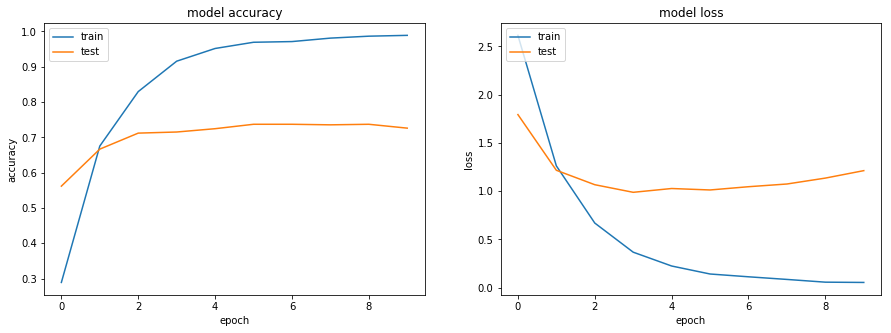

In [98]:
scores = model.evaluate(x_test_trans, y_test_bin, verbose=0)
for val in range(len(scores)):
    print("Model %s: %.2f" % (model.metrics_names[val], scores[val]))

print(model_history.history.keys())

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(model_history.history["acc"])
plt.plot(model_history.history["val_acc"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")

plt.subplot(1, 2, 2)
plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()